# Social Network Analysis

In this notebook we will be exploring the dynamics of social network analysis. First, we will build our own social network using your classmates connections as an example. 

In [2]:
#import relevant libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from networkx.algorithms.community import greedy_modularity_communities


## Example 1: Creating our own social network

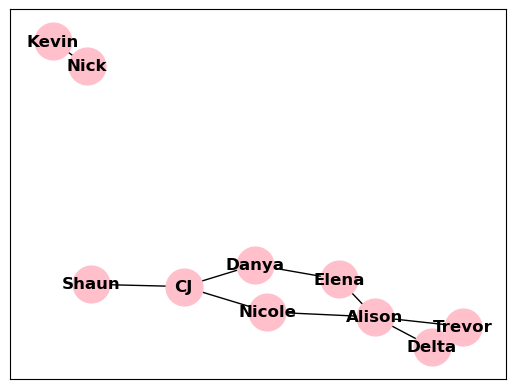

In [11]:
#Create a new social network

# Create a new graph
G = nx.Graph()

# Add nodes with names
G.add_node("Alison")
G.add_node("Nicole")
G.add_node("Trevor")
G.add_node("CJ")
G.add_node("Elena")
G.add_node("Shaun")
G.add_node("Kevin")

# Add edges between some of the nodes
G.add_edge("Alison", "Nicole")
G.add_edge("Alison", "Trevor")
G.add_edge("Trevor", "Delta")
G.add_edge("CJ", "Nicole")
G.add_edge("Alison", "Elena")
G.add_edge("Alison", "Delta")
G.add_edge("Elena", "Danya")
G.add_edge("CJ", "Danya")
G.add_edge("CJ", "Shaun")
G.add_edge("Nick", "Kevin")

# Draw the graph
nx.draw_networkx(G, with_labels=True, node_color='pink', font_weight='bold', node_size=700)

# Show the graph
plt.show()


In [12]:
#now create a graph with directions where flow of information is asymmetric

G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('Alison','Nicole')
G_asymmetric.add_edge('Alison','Danya')
G_asymmetric.add_edge('CJ','Alison')
G_asymmetric.add_edge('Danya','Elena')
G_asymmetric.add_edge('CJ','Elena')
G_asymmetric.add_edge('Shaun','Elena')
G_asymmetric.add_edge('Danya','Shaun')
G_asymmetric.add_edge('CJ','Kevin')
G_asymmetric.add_edge('Kevin','Alison')

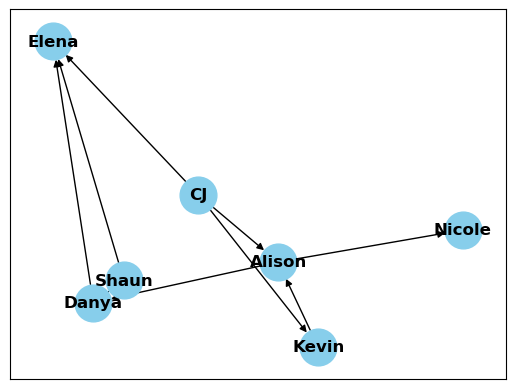

In [13]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric, with_labels=True, node_color='skyblue', font_weight='bold', node_size=700)

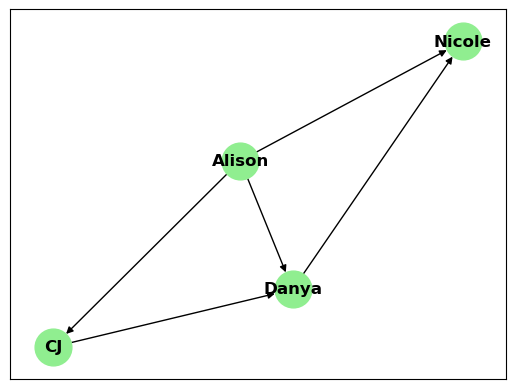

In [14]:

# Create a new directed graph
G = nx.DiGraph()

# Add nodes with made-up names
G.add_node("Alison")
G.add_node("Nicole")
G.add_node("CJ")
G.add_node("Danya")

# Add directed edges between some of the nodes
# The direction is from the first node to the second node
G.add_edge("Alison", "Nicole")
G.add_edge("Alison", "CJ")
G.add_edge("CJ", "Danya")
G.add_edge("Danya", "Nicole")
G.add_edge("Alison", "Danya")

# Draw the graph
nx.draw_networkx(G, with_labels=True, node_color='lightgreen', font_weight='bold', node_size=700, arrows=True)

# Show the graph
plt.show()
    

## Centrality Measures

1. Degree of Centrality
2. Shortest path between two nodes
3. Betweeness Centrality
4. Closeness Centrality

In [15]:
#find the degree of centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for individual, centrality in degree_centrality.items():
    print(f"{individual}: {centrality:.2f}")


Degree Centrality:
Alison: 1.00
Nicole: 0.67
CJ: 0.67
Danya: 1.00


In [21]:
shortest_path = nx.shortest_path(G, source="Alison", target="CJ")
print("Shortest path from Alison to Danya:", " -> ".join(shortest_path))


Shortest path from Alison to Danya: Alison -> CJ


In [22]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:")
for individual, centrality in betweenness_centrality.items():
    print(f"{individual}: {centrality:.2f}")


Betweenness Centrality:
Alison: 0.00
Nicole: 0.00
CJ: 0.00
Danya: 0.17


In [23]:

# Assuming G is your graph
closeness_centrality = nx.closeness_centrality(G)

# To display the closeness centrality of each node
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness}")


Node Alison: Closeness Centrality = 0.0
Node Nicole: Closeness Centrality = 0.75
Node CJ: Closeness Centrality = 0.3333333333333333
Node Danya: Closeness Centrality = 0.6666666666666666


## Communities

Finding subgroups of friends within the network

In [24]:
communities = list(greedy_modularity_communities(G))
print("Communities:")
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {', '.join(community)}")


Communities:
Community 1: Nicole, Danya
Community 2: CJ, Alison


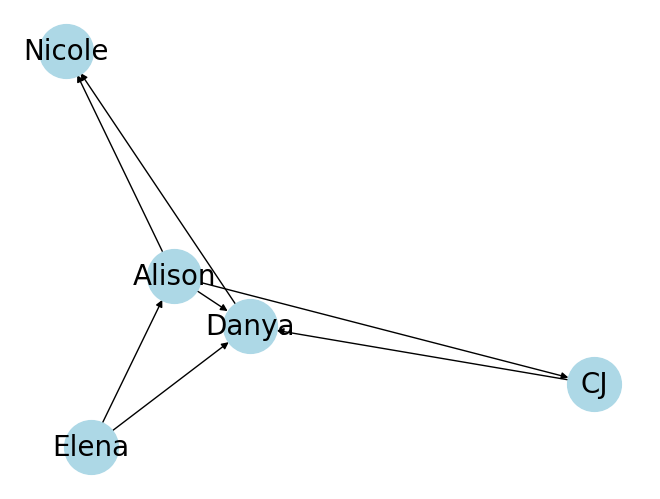

In [25]:
# Add a new node
G.add_node("Elena")

# Connect the new node with existing nodes
G.add_edge("Elena", "Alison")
G.add_edge("Elena", "Danya")

# You could visualize the network again here to see the changes
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, font_size=20)
plt.show()


## More Advanced Metrics of Centrality

5. EigenCentrality
6. PageRank

In [26]:
# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
print("\nEigenvector Centrality:")
for individual, centrality in eigenvector_centrality.items():
    print(f"{individual}: {centrality:.4f}")

# Calculate PageRank
pagerank = nx.pagerank(G)
print("\nPageRank:")
for individual, rank in pagerank.items():
    print(f"{individual}: {rank:.4f}")



Eigenvector Centrality:
Alison: 0.0000
Nicole: 1.0000
CJ: 0.0000
Danya: 0.0044
Elena: 0.0000

PageRank:
Alison: 0.1317
Nicole: 0.3670
CJ: 0.1297
Danya: 0.2792
Elena: 0.0924


## Example 2 Examining Social Networks on Twitter

This is a dataset from [Stanford SNAP Database](https://snap.stanford.edu/data/ego-Twitter.html) using scrapped data from Twitter. You can explore the dataset properties by clicking on the link.

In [4]:
#Import the data 

twitter = pd.read_csv(
    "twitter_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
twitter

start_node   end_node
0         214328887   34428380
1          17116707   28465635
2         380580781   18996905
3         221036078  153460275
4         107830991   17868918
...             ...        ...
2420761    99841247  154263215
2420762    99841247  194403468
2420763    99841247  180165101
2420764    99841247  253509115
2420765    99841247  463410501

[2420766 rows x 2 columns]

In [87]:
import gzip

file_path = 'twitter_combined.txt.gz'

# Load the data
with gzip.open(file_path, 'rb') as file:
    for line in file:
        # Decode the line assuming UTF-8 encoding
        decoded_line = line.decode('utf-8')
        user1, user2 = decoded_line.strip().split()
        G.add_edge(user1, user2)

In [90]:

# Initialize an empty directed graph, as Twitter relationships are directional
G = nx.DiGraph()

# Path to the extracted file
file_path = 'twitter_combined.txt.gz'

# Load the data
with gzip.open(file_path, 'rb') as file:
    for line in file:
        # Decode the line assuming UTF-8 encoding
        decoded_line = line.decode('utf-8')
        user1, user2 = decoded_line.strip().split()
        G.add_edge(user1, user2)

print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Loaded graph with 81306 nodes and 1768149 edges


In [91]:
# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Nodes: {num_nodes}, Edges: {num_edges}")

# Calculate density of the graph
density = nx.density(G)
print(f"Density: {density:.6f}")

# Find the largest strongly connected component (SCC)
largest_scc = max(nx.strongly_connected_components(G), key=len)
subgraph_scc = G.subgraph(largest_scc)
print(f"Largest SCC contains {subgraph_scc.number_of_nodes()} nodes")


Nodes: 81306, Edges: 1768149
Density: 0.000267
Largest SCC contains 68413 nodes


In [92]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

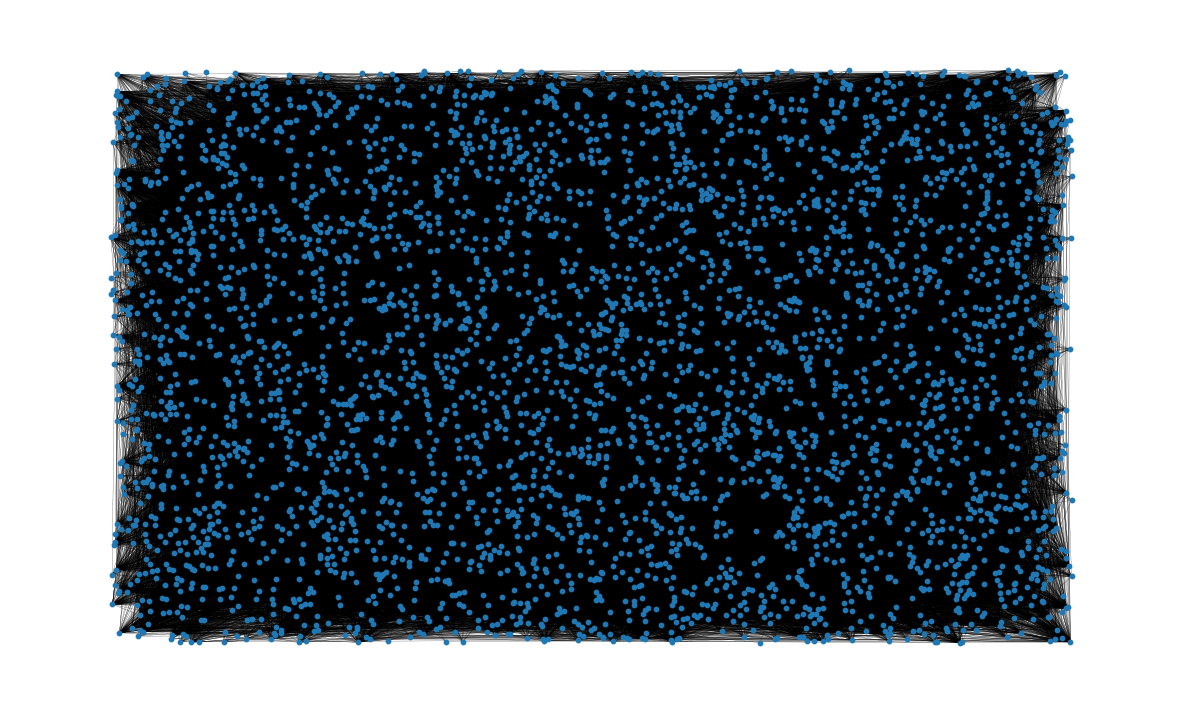

In [95]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

In [96]:
G.number_of_nodes()

4039

In [97]:
G.number_of_edges()

88234

In [98]:
np.mean([d for _, d in G.degree()])

43.69101262688784

In [99]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [100]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

Text(0, 0.5, 'Frequency (%)')

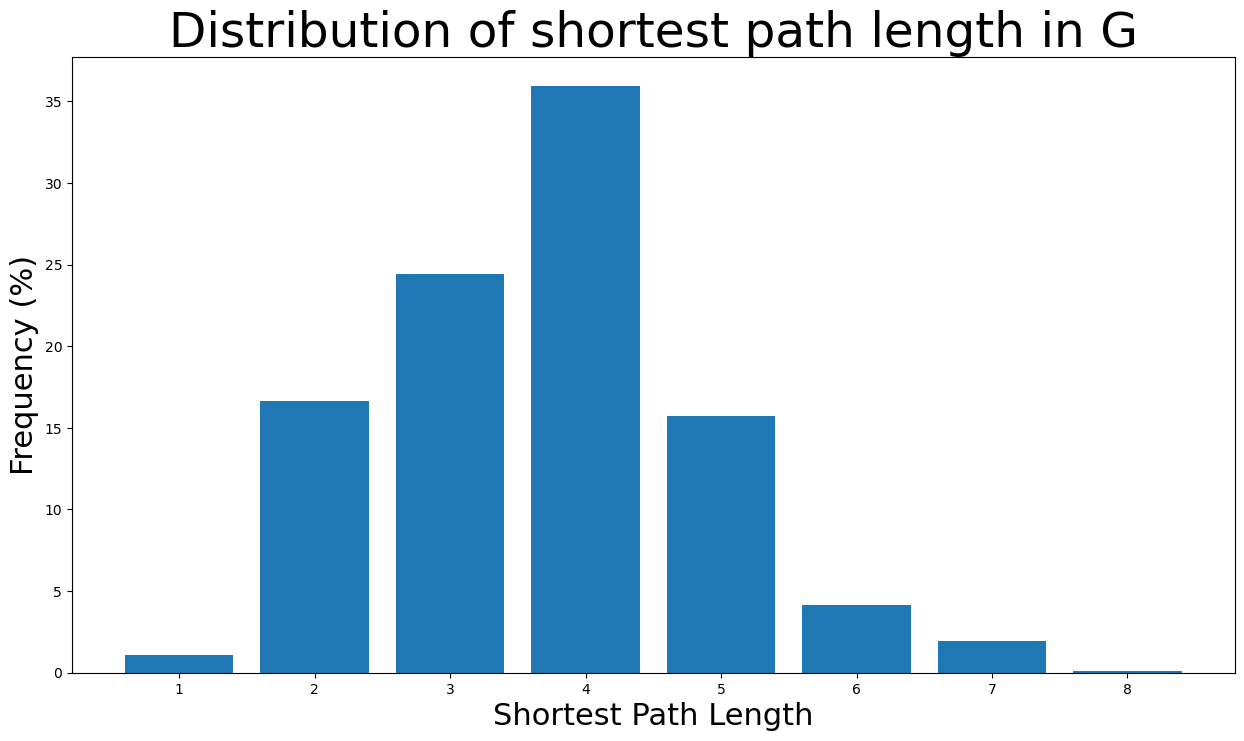

In [101]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [102]:
nx.density(G)

0.010819963503439287

In [103]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

In [104]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

Text(0, 0.5, 'Counts')

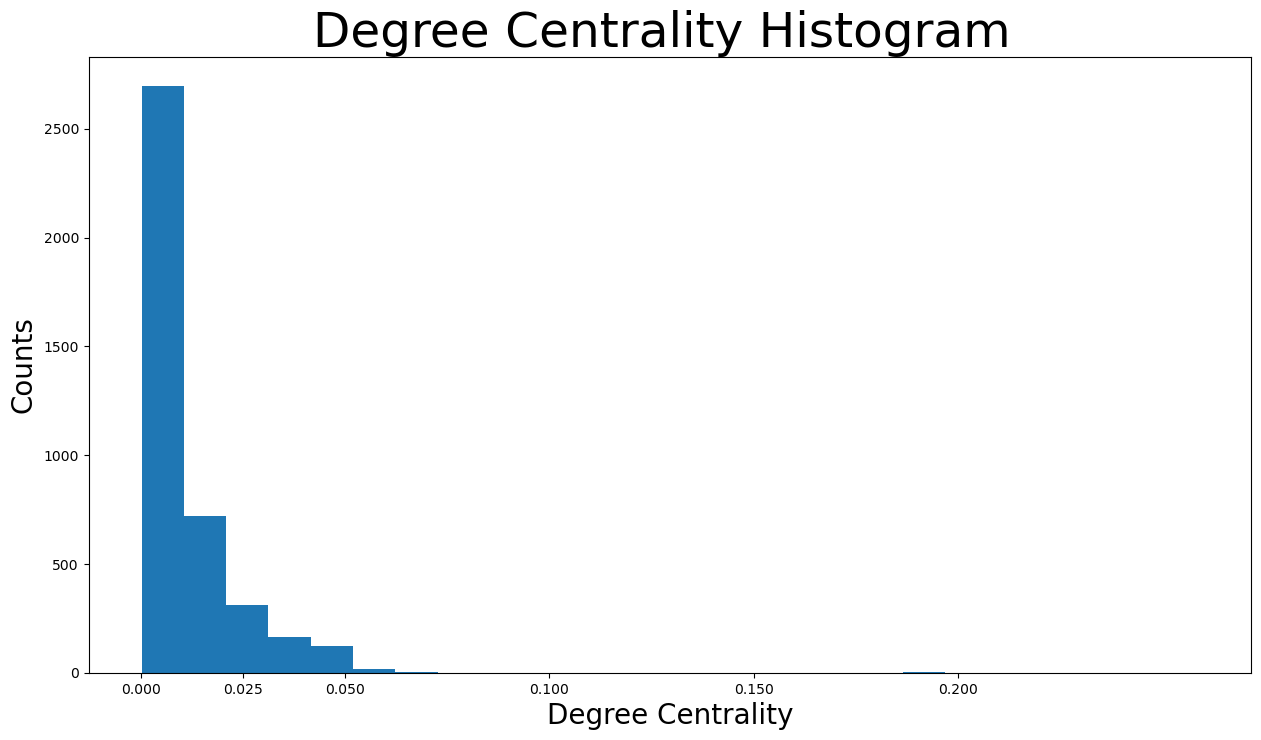

In [105]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

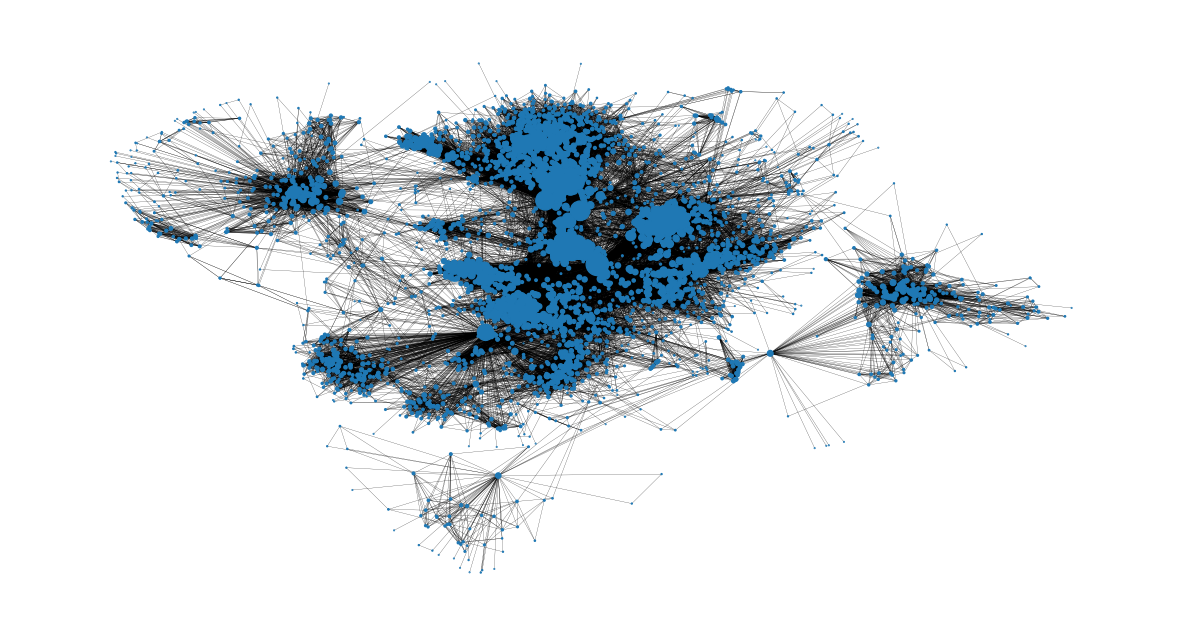

In [106]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [107]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215)]

Text(0, 0.5, 'Counts')

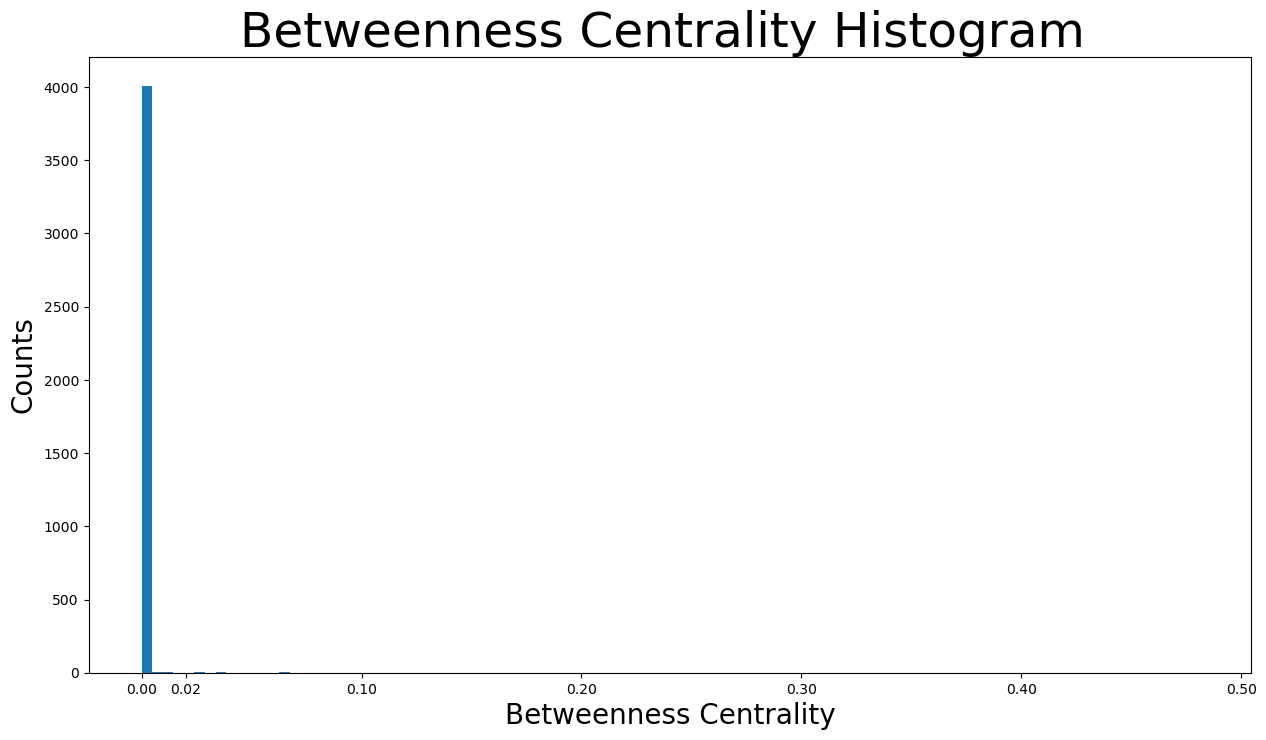

In [108]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

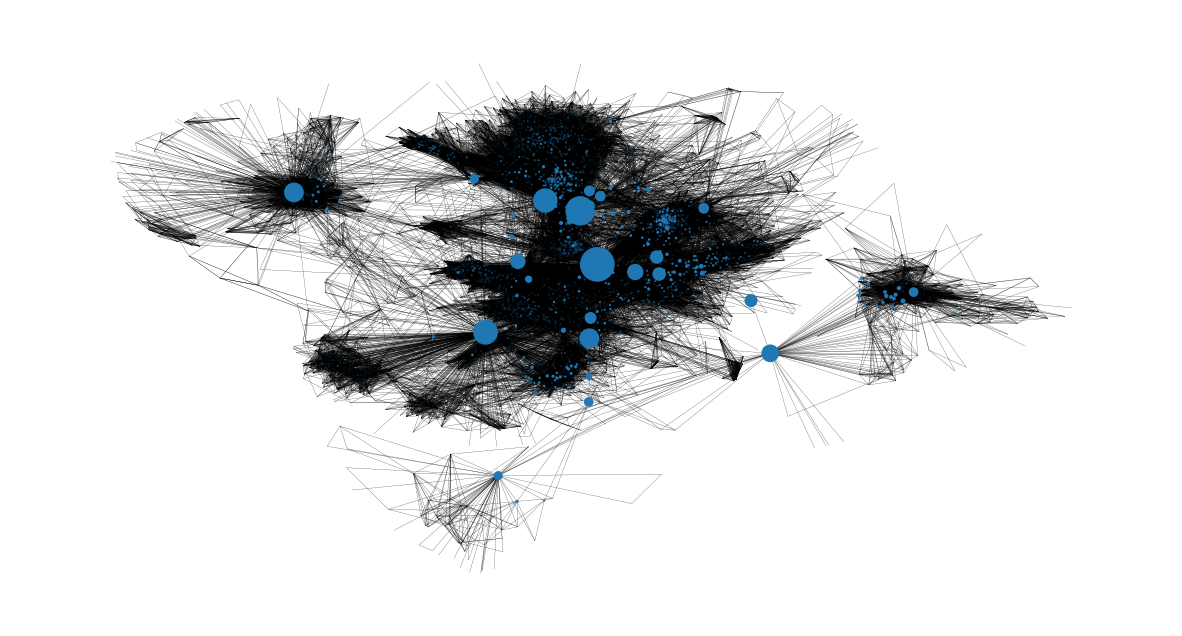

In [109]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

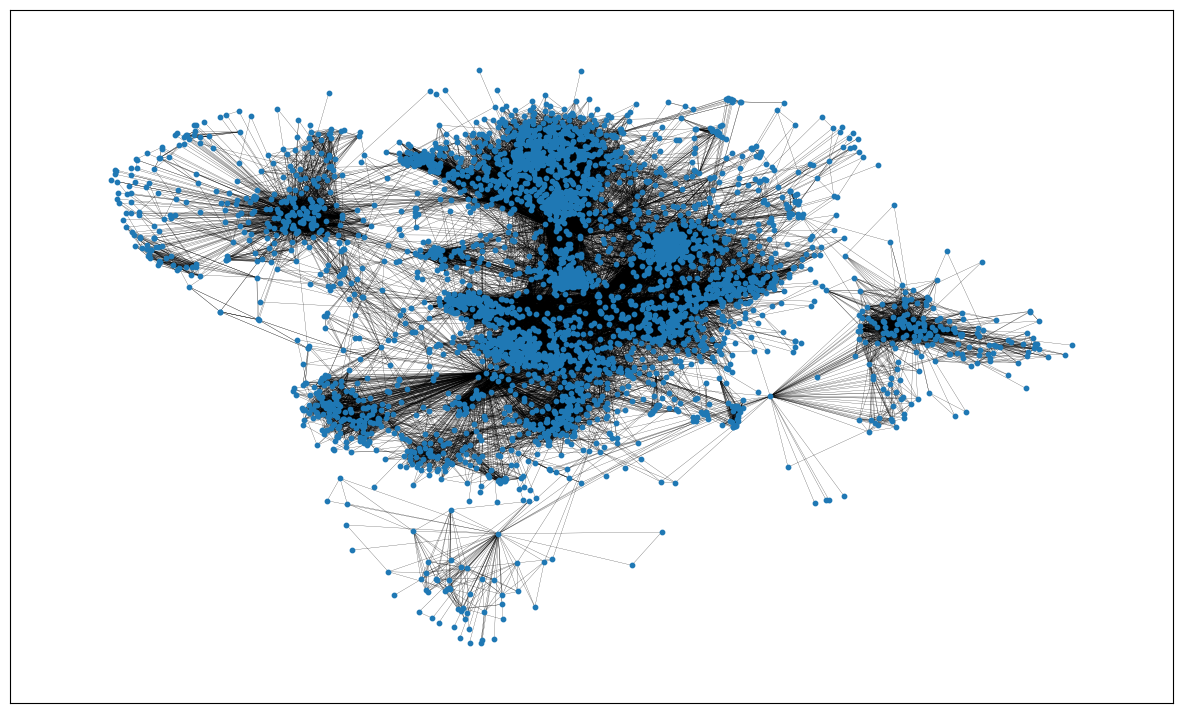

In [110]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))

nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

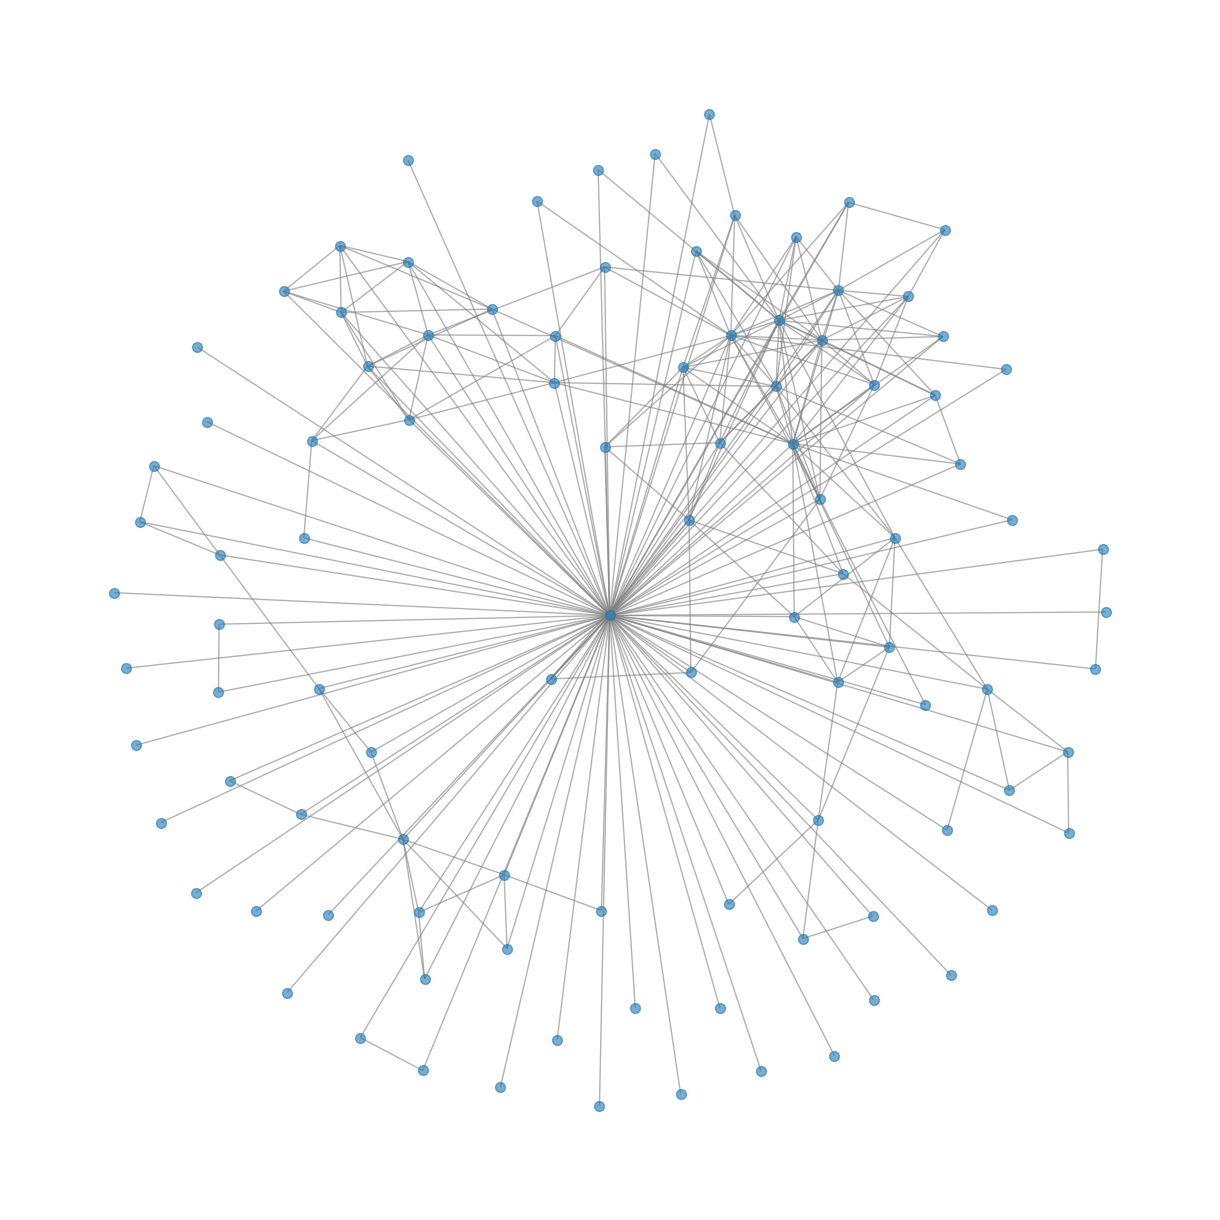

In [111]:
import matplotlib.pyplot as plt

# Extract a subgraph of the first 100 nodes
subgraph_nodes = list(G.nodes())[:100]
subgraph = G.subgraph(subgraph_nodes)

# Draw the subgraph
plt.figure(figsize=(12, 12))
nx.draw(subgraph, with_labels=False, node_size=50, alpha=0.6, edge_color='gray')
plt.show()


### Who are the most connected individuals in the network?

In [112]:
# Example: Compute in-degree centrality for the SCC
in_degree_centrality = nx.in_degree_centrality(subgraph_scc)
# Due to potentially large output, here we show how to get the top 5
top_5 = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by in-degree centrality in the largest SCC:")
for user, centrality in top_5:
    print(f"User {user}: {centrality:.4f}")

Top 5 nodes by in-degree centrality in the largest SCC:
User 40981798: 0.0470
User 43003845: 0.0400
User 813286: 0.0387
User 22462180: 0.0361
User 34428380: 0.0360


In [113]:
try:
    eig_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    # Optionally, print the top N nodes by eigenvector centrality
    top_n = sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 nodes by Eigenvector Centrality:")
    for node, centrality in top_n:
        print(f"{node}: {centrality:.4f}")
except nx.PowerIterationFailedConvergence as e:
    print(f"Error calculating eigenvector centrality: {e}")


Top 5 nodes by Eigenvector Centrality:
1912: 0.0954
2266: 0.0870
2206: 0.0861
2233: 0.0852
2464: 0.0843


In [114]:
pagerank = nx.pagerank(G, alpha=0.85)  # alpha is the damping parameter
# Optionally, print the top N nodes by PageRank
top_n = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by PageRank:")
for node, rank in top_n:
    print(f"{node}: {rank:.4f}")


Top 5 nodes by PageRank:
3437: 0.0076
107: 0.0069
1684: 0.0064
0: 0.0063
1912: 0.0039


In [115]:

communities = list(greedy_modularity_communities(G))
print(f"Detected {len(communities)} communities.")

Detected 13 communities.


In [ ]:
# Assuming `communities` is a list of sets, where each set contains the nodes in a community
community = list(communities[0])  # Let's take the first community for visualization
subgraph = G.subgraph(community)

plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=False, node_size=50, edge_color='black', alpha=0.5)
plt.title("Visualization of a Community")
plt.show()


In [ ]:
# Assuming G is your directed graph
pagerank = nx.pagerank(G, alpha=0.85)


In [ ]:
# Sort nodes by PageRank score and pick the top 5
top_5_influencers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_nodes = [node for node, _ in top_5_influencers]
print("Top 5 Influencers:", top_5_nodes)


In [ ]:
# Measure assortativity by degree
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity Coefficient: {assortativity:.4f}")


In [ ]:
# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")


In [ ]:
# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")


In [ ]:
import community as community_louvain

# Note: This approach treats the directed graph as undirected for the purpose of community detection
partition = community_louvain.best_partition(G.to_undirected())


In [ ]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'G' is your original directed graph
G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected)


In [ ]:
# Generate position for each node using one of NetworkX's layout algorithms
pos = nx.spring_layout(G_undirected)

# Color the nodes based on their partition
# cmap is the Matplotlib colormap used to generate colors
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_undirected, pos, partition.keys(), node_size=70,
                       cmap='plasma', node_color=list(partition.values()))
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
plt.show()


## Example 3 Facebook Data

This is a dataset from [Stanford SNAP Database](https://snap.stanford.edu/data/ego-Facebook.html) using scrapped data from Facebook. You can explore the dataset properties by clicking on the link.

In [34]:
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

start_node  end_node
0               0         1
1               0         2
2               0         3
3               0         4
4               0         5
...           ...       ...
88229        4026      4030
88230        4027      4031
88231        4027      4032
88232        4027      4038
88233        4031      4038

[88234 rows x 2 columns]

In [35]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

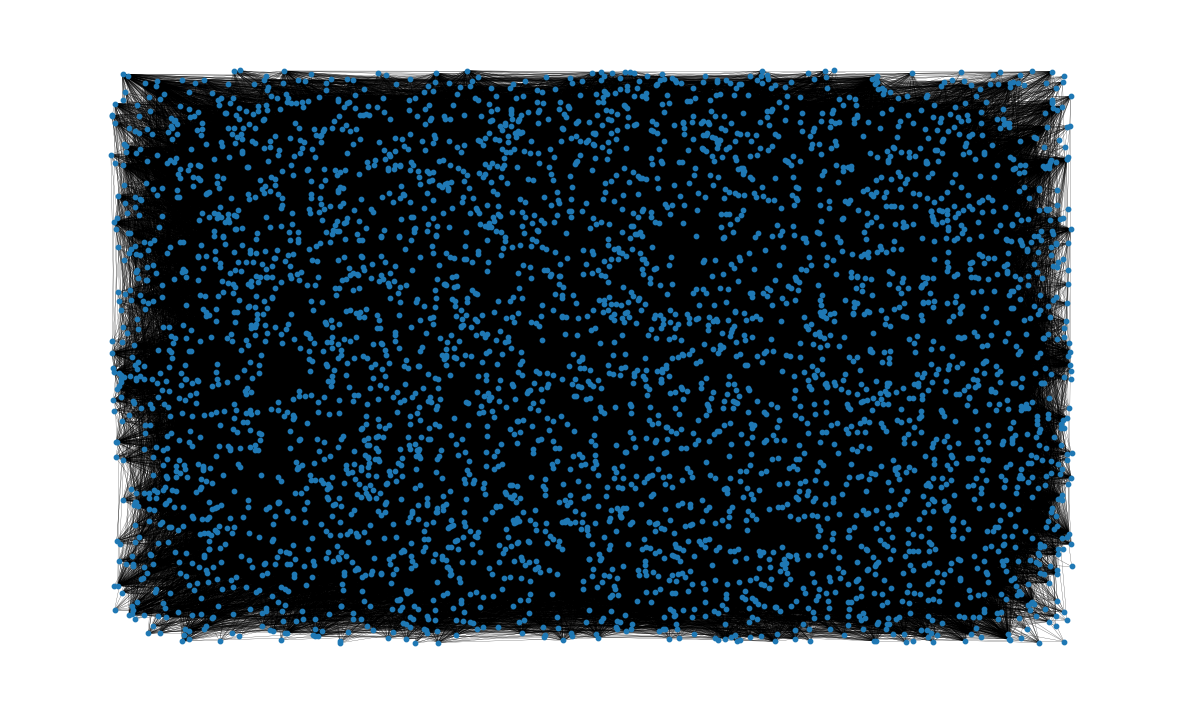

In [36]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

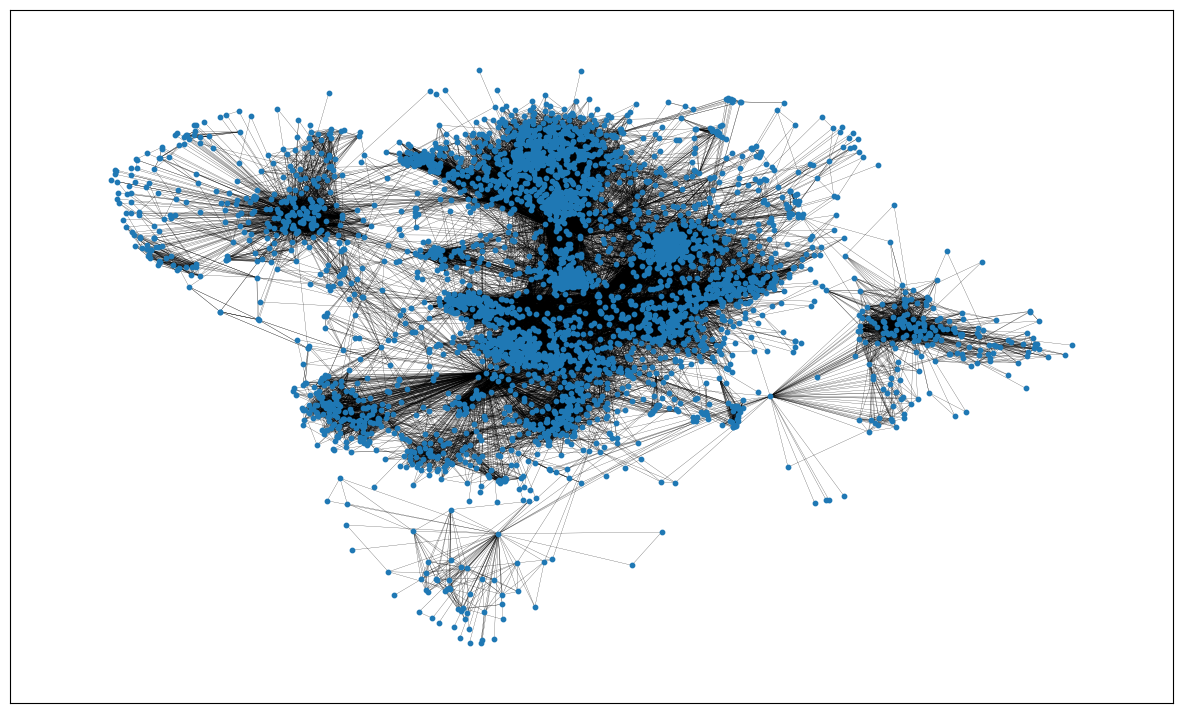

In [37]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))

nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [38]:
G.number_of_nodes()


4039

In [39]:
G.number_of_edges()

88234

In [44]:
import numpy as np
import networkx as nx


In [45]:
np.mean([d for _, d in G.degree()])

43.69101262688784

In [46]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [42]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [47]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

Text(0, 0.5, 'Frequency (%)')

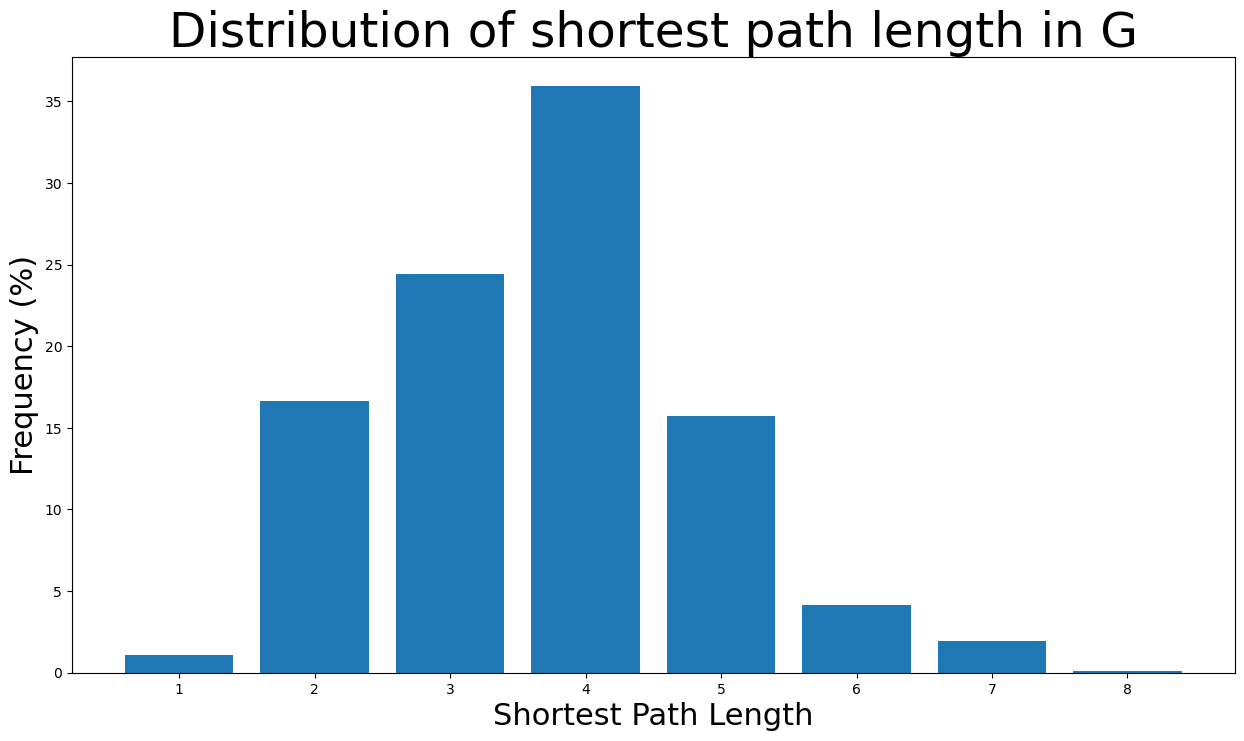

In [48]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [49]:
nx.density(G)

0.010819963503439287

In [50]:
nx.number_connected_components(G)

1

In [51]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

In [52]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

Text(0, 0.5, 'Counts')

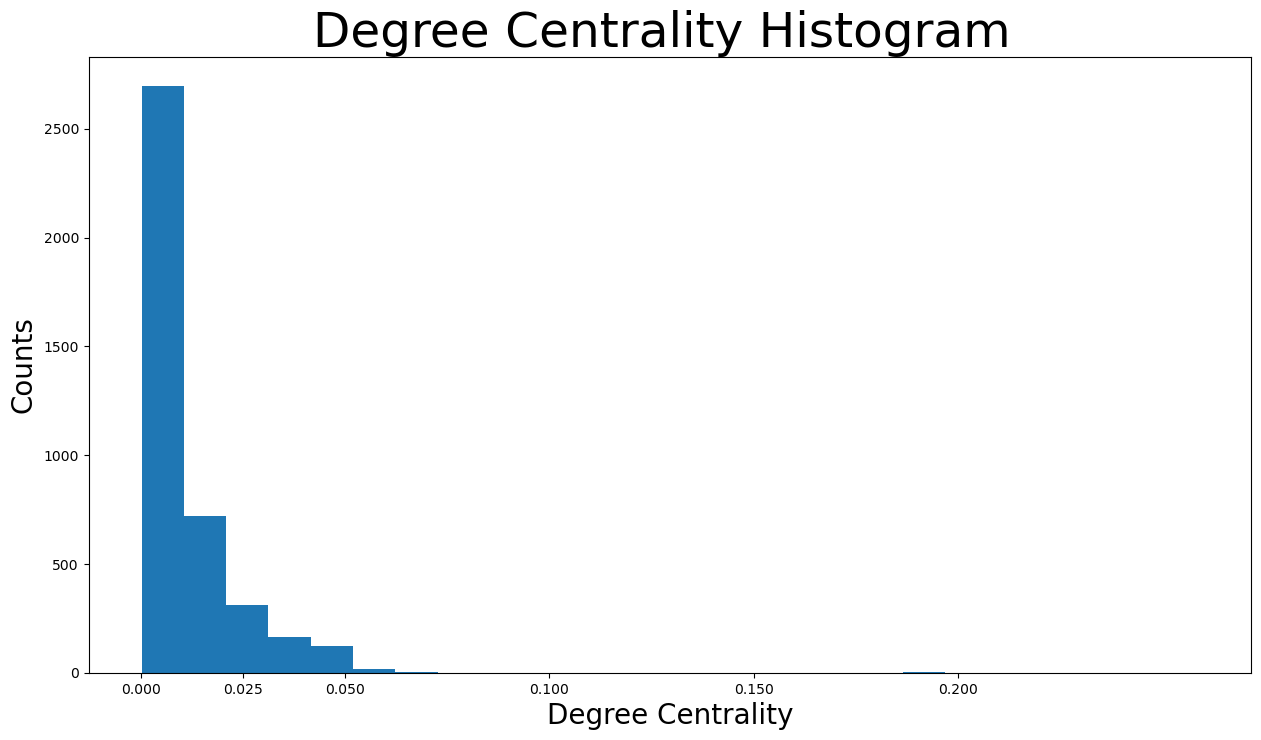

In [53]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

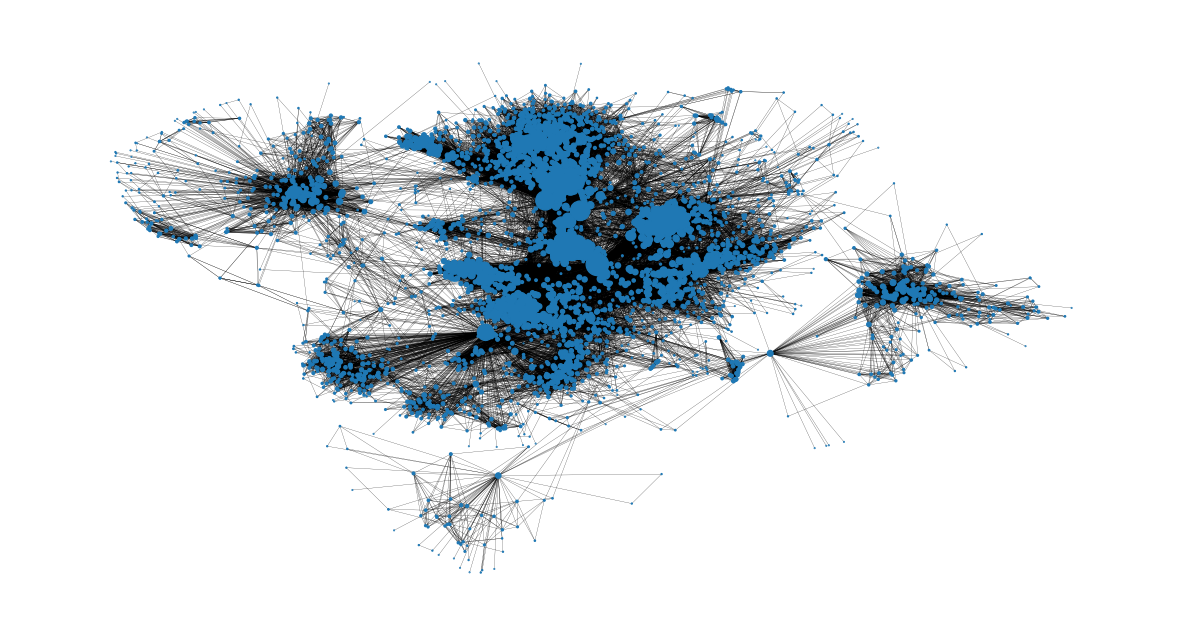

In [54]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [55]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215)]

Text(0, 0.5, 'Counts')

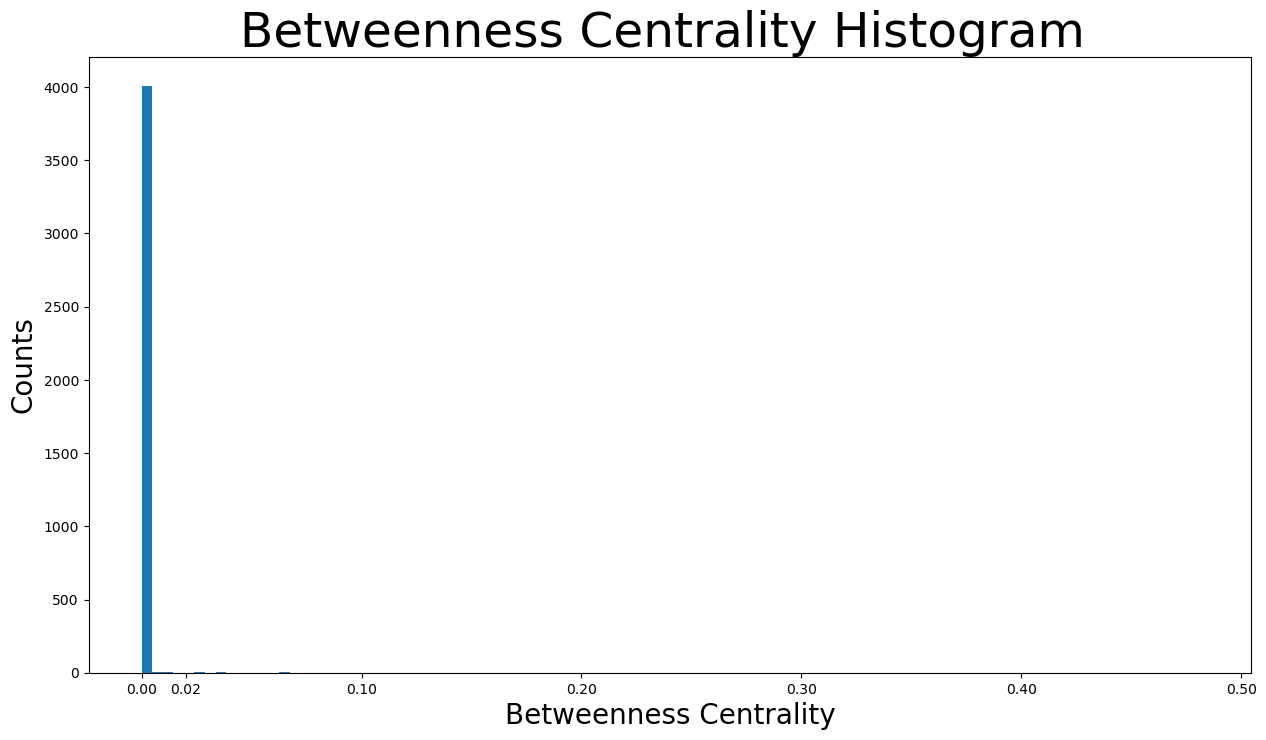

In [56]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

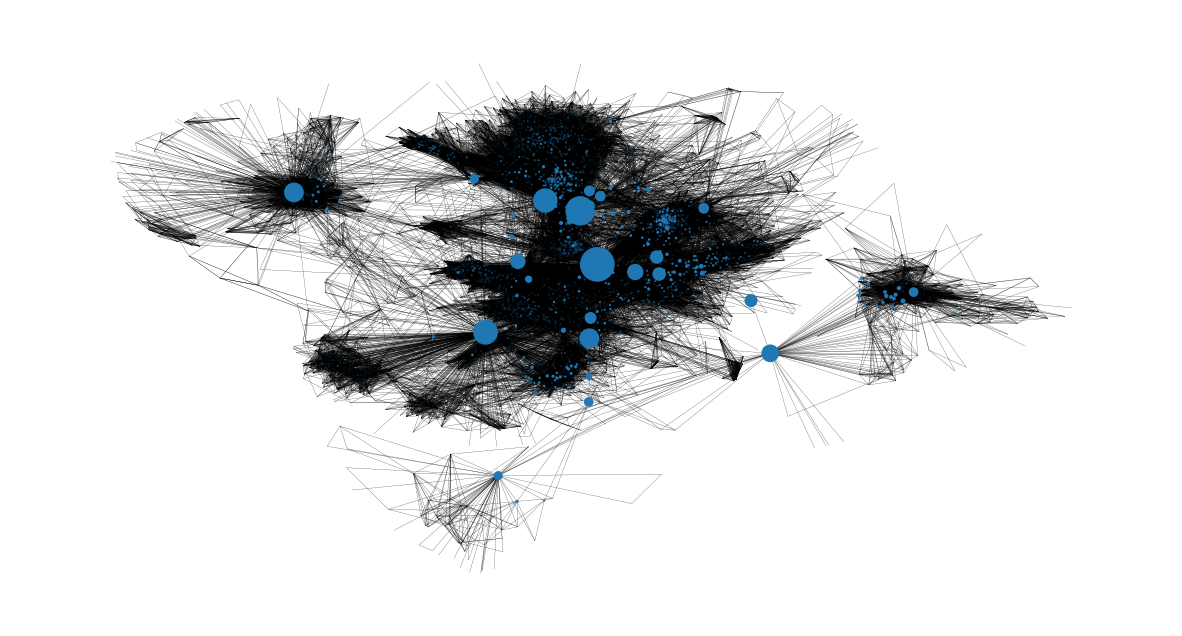

In [57]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [58]:
closeness_centrality = nx.centrality.closeness_centrality(
    G
)  # save results in a variable to use again
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739)]

Text(0, 0.5, 'Counts')

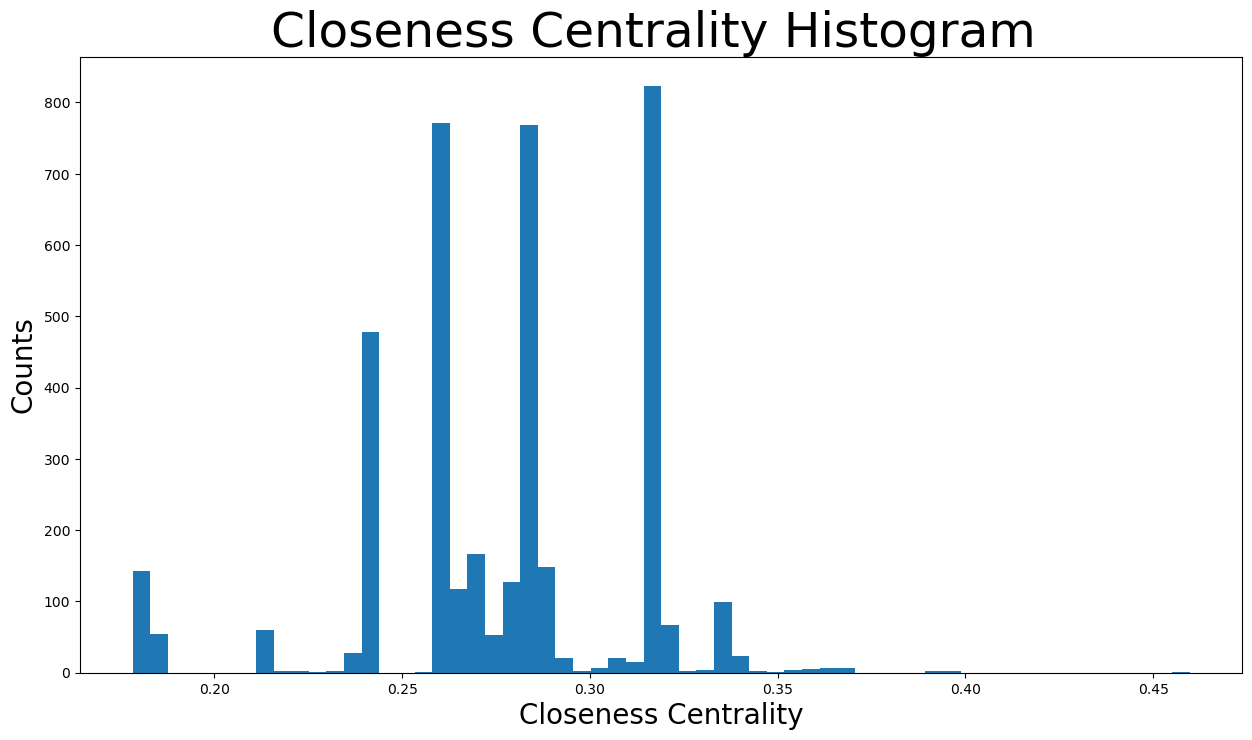

In [59]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

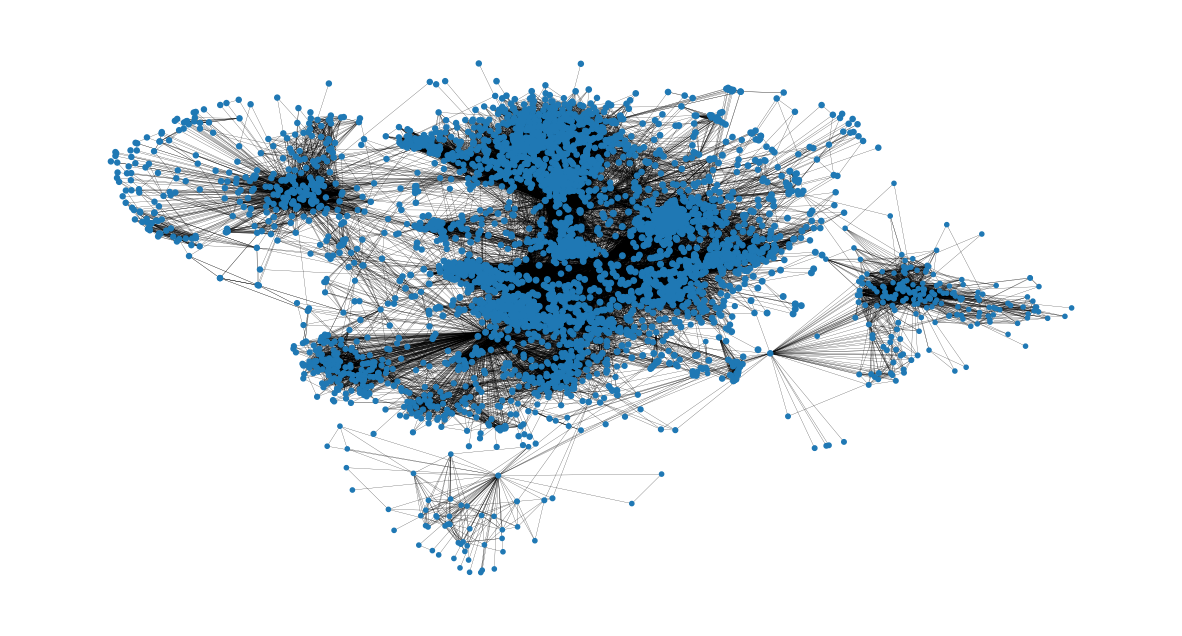

In [63]:
node_size = [
    v * 50 for v in closeness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=.15)
plt.axis("off")

In [64]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(
    G
)  # save results in a variable to use again
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(1912, 0.09540696149067629),
 (2266, 0.08698327767886552),
 (2206, 0.08605239270584342),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092),
 (2142, 0.08419311897991795),
 (2218, 0.0841557356805503),
 (2078, 0.08413617041724977),
 (2123, 0.08367141238206224),
 (1993, 0.0835324284081597)]

In [65]:
high_eigenvector_centralities = (
    sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
)[
    1:10
]  # 2nd to 10th nodes with heighest eigenvector centralities
high_eigenvector_nodes = [
    tuple[0] for tuple in high_eigenvector_centralities
]  # set list as [2266, 2206, 2233, 2464, 2142, 2218, 2078, 2123, 1993]
neighbors_1912 = [n for n in G.neighbors(1912)]  # list with all nodes connected to 1912
all(
    item in neighbors_1912 for item in high_eigenvector_nodes
)  # check if items in list high_eigenvector_nodes exist in list neighbors_1912

True

Text(0, 0.5, 'Counts')

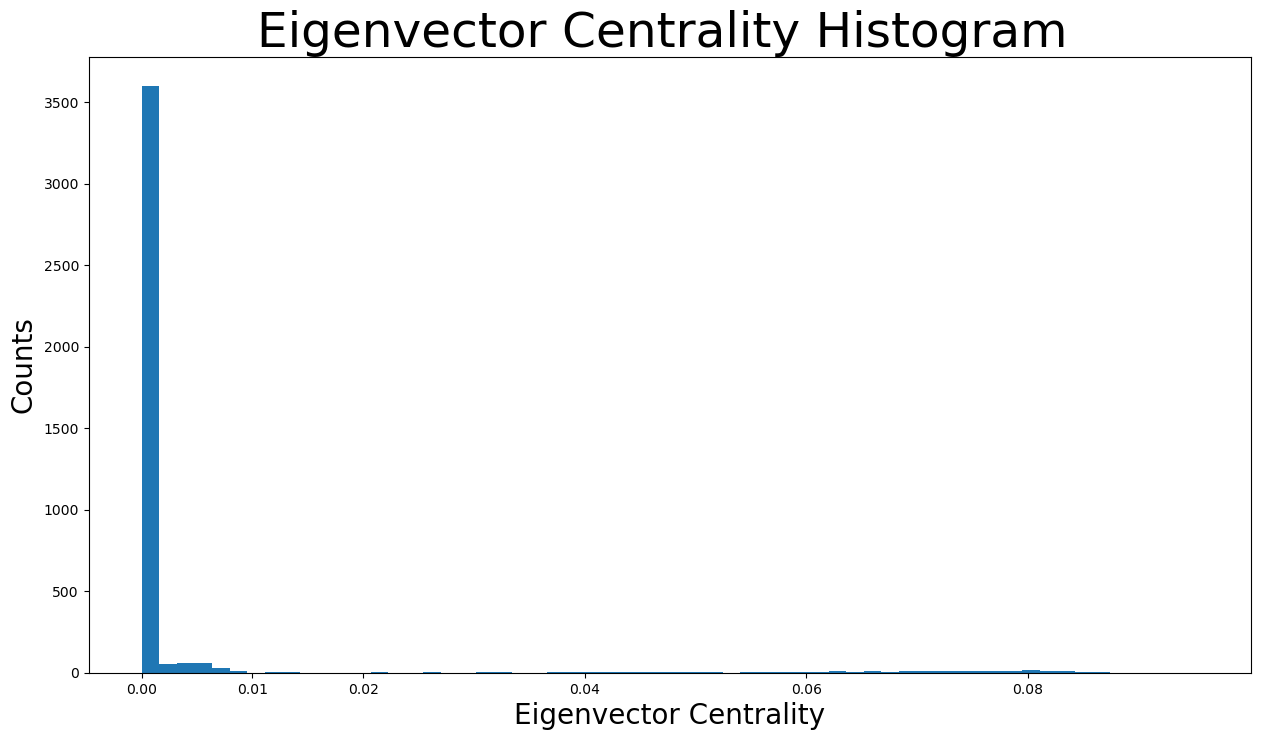

In [66]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

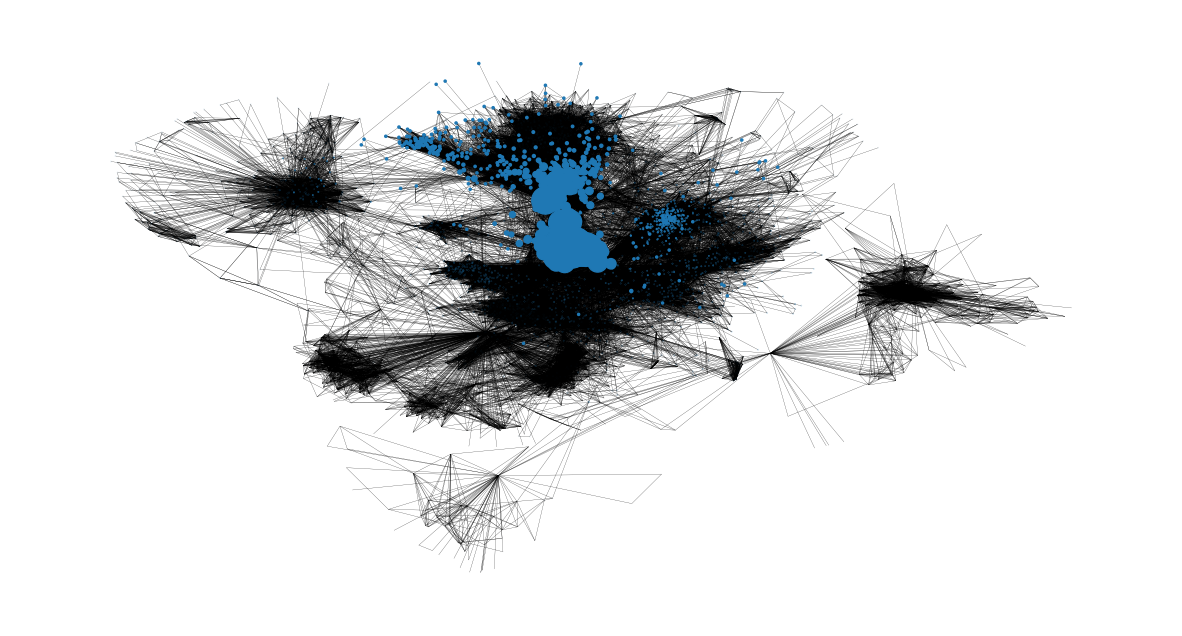

In [67]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [68]:
nx.average_clustering(G)

0.6055467186200876

Text(0, 0.5, 'Counts')

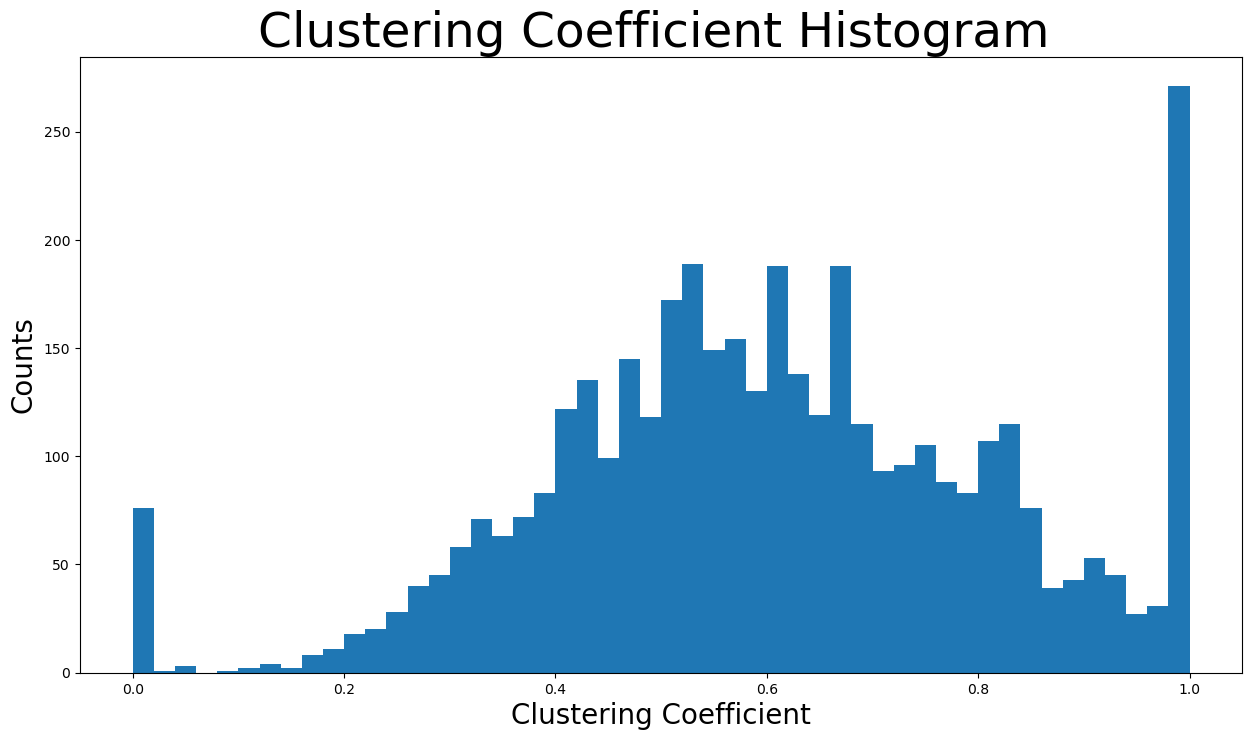

In [69]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [ ]:
triangles_per_node = list(nx.triangles(G).values())
sum(
    triangles_per_node
) / 3  # divide by 3 because each triangle is counted once for each node

In [70]:
nx.has_bridges(G)

True

In [71]:
bridges = list(nx.bridges(G))
len(bridges)

75

In [72]:
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

78

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

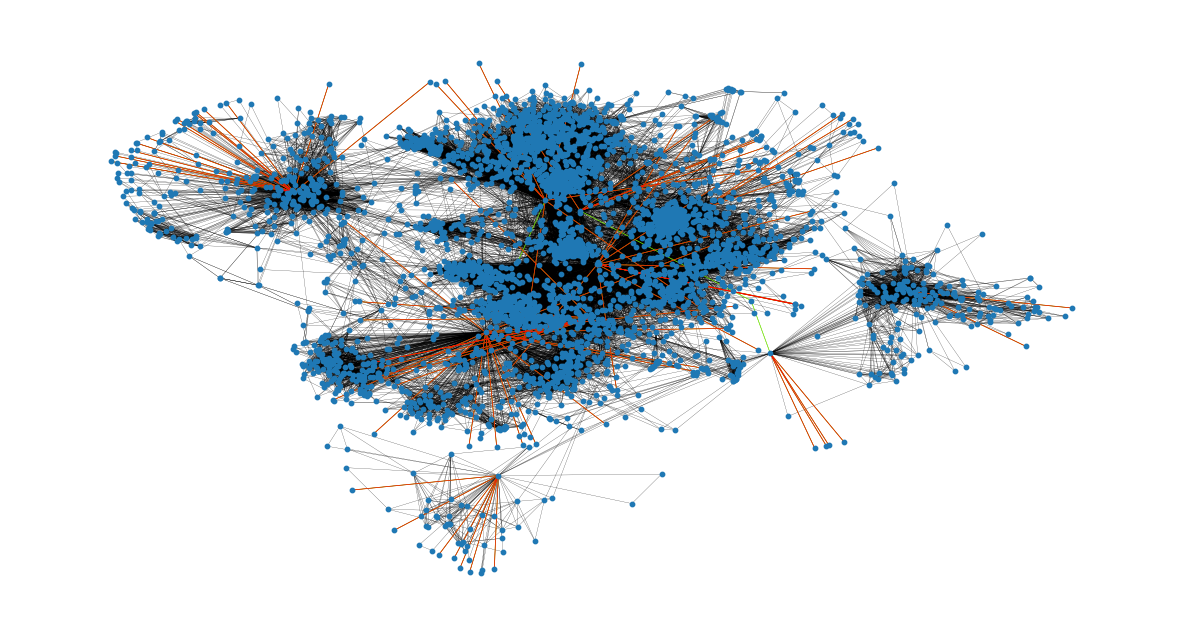

In [73]:
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(
    G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen"
)  # green color for local bridges
nx.draw_networkx_edges(
    G, pos, edgelist=bridges, width=0.5, edge_color="r"
)  # red color for bridges
plt.axis("off")

In [74]:
nx.degree_assortativity_coefficient(G)

0.06357722918564943

In [76]:
from random import randint
import networkx as nx

In [77]:
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

44

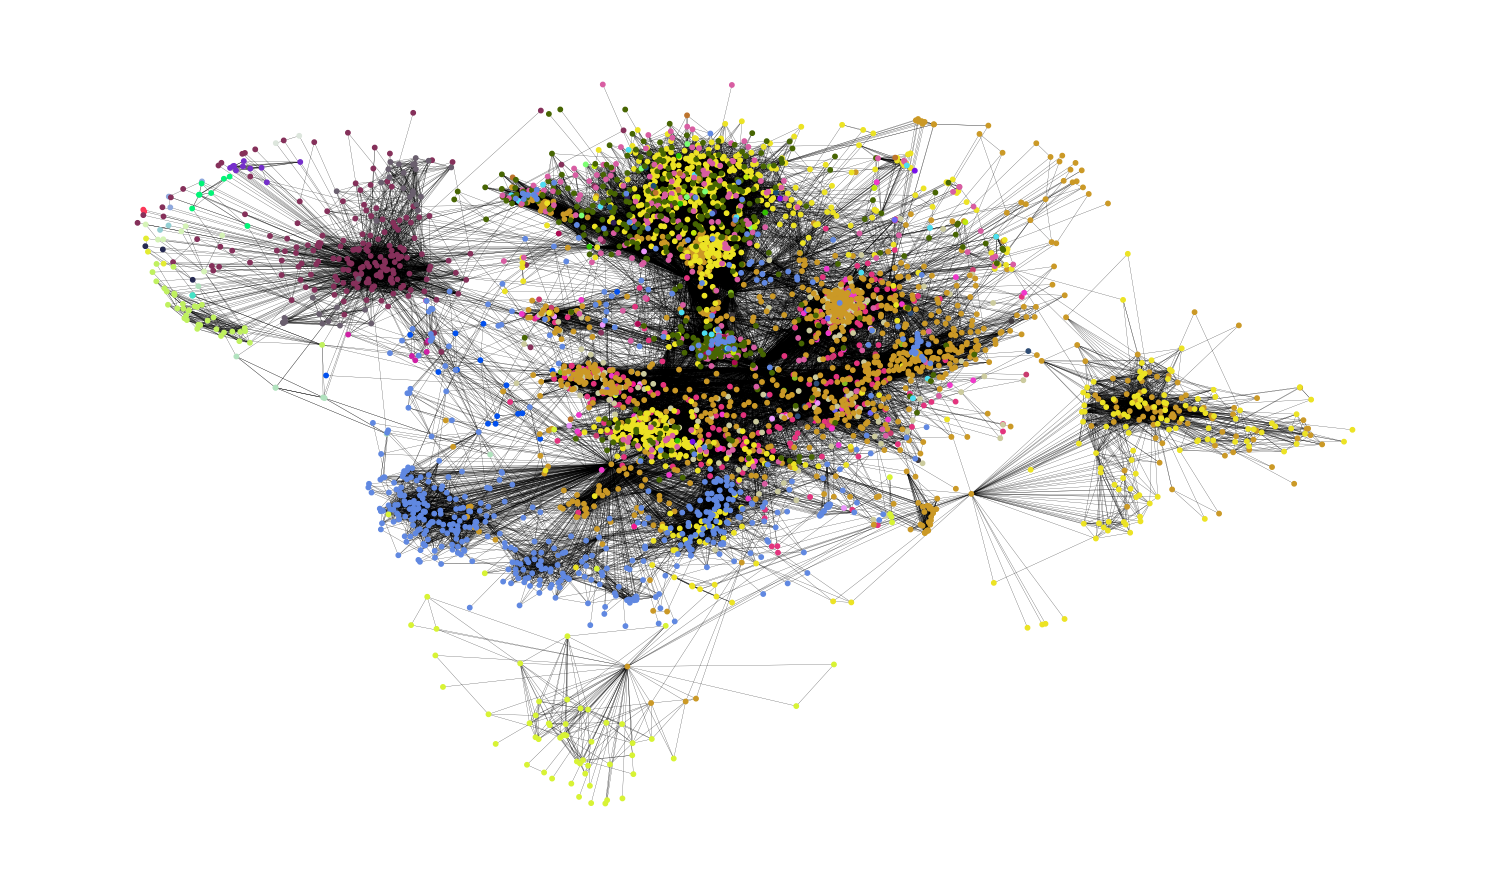

In [78]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)
plt.tight_layout()

In [79]:
colors = ["" for x in range(G.number_of_nodes())]
for com in nx.community.asyn_fluidc(G, 8, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color

In [ ]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)